# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

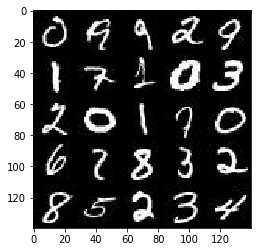

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

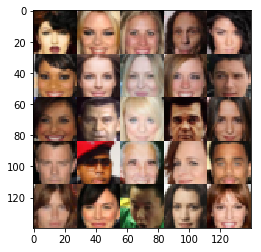

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
   
    input_shape = (None,image_width,image_height,image_channels)
   
    
    input_real = tf.placeholder(tf.float32,shape=input_shape)
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    learningRate = tf.placeholder(tf.float32)   
    return input_real, inputs_z, learningRate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.02
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [15]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.02
    if(is_train):
        reuse=False
    else:
        reuse=True
    with tf.variable_scope('generator',reuse=reuse):
        
        x2 = tf.layers.dense(z, 8*8*512)
        # Reshape it to start the convolutional stack
        x2 = tf.reshape(x2, (-1, 8, 8, 512))        
        #x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x512 now
        
        x3 = tf.layers.conv2d_transpose(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x256 now
        x4 = tf.layers.conv2d_transpose(x3, 128, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 32x32x128 now
        logits = tf.layers.conv2d(x4, out_channel_dim, 5, strides=1, padding='valid')
        #28x28x3 now
        out =  tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):

        # Optimize
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    image_width=data_shape[1]
    image_height=data_shape[2]
    image_channels=data_shape[3]
    
    input_real, input_z, learningRate = model_inputs(image_width, image_height, image_channels, z_dim) 
    
    out_channel_dim = 3 if data_image_mode == 'RGB' else 1
    
    d_loss, g_loss = model_loss(input_real, input_z,out_channel_dim)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learningRate, beta1)
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):               
                steps += 1
                # TODO: Train Model
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z,learningRate:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,input_z: batch_z,learningRate:learning_rate})
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0:                    
                    show_generator_output(sess, 10, input_z, out_channel_dim, data_image_mode)
                    
                    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0077... Generator Loss: 5.1669
Epoch 1/2... Discriminator Loss: 0.0029... Generator Loss: 10.4322
Epoch 1/2... Discriminator Loss: 0.1015... Generator Loss: 7.8260
Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: 8.1616
Epoch 1/2... Discriminator Loss: 0.0069... Generator Loss: 6.9440
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 6.1277
Epoch 1/2... Discriminator Loss: 0.0026... Generator Loss: 6.7061
Epoch 1/2... Discriminator Loss: 0.0179... Generator Loss: 5.0880
Epoch 1/2... Discriminator Loss: 0.0093... Generator Loss: 5.8688
Epoch 1/2... Discriminator Loss: 0.0028... Generator Loss: 7.8987


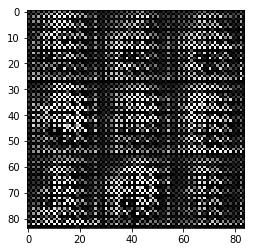

Epoch 1/2... Discriminator Loss: 0.0038... Generator Loss: 6.2288
Epoch 1/2... Discriminator Loss: 0.0042... Generator Loss: 6.6123
Epoch 1/2... Discriminator Loss: 0.0052... Generator Loss: 5.9321
Epoch 1/2... Discriminator Loss: 0.0025... Generator Loss: 6.7853
Epoch 1/2... Discriminator Loss: 0.0016... Generator Loss: 7.4976
Epoch 1/2... Discriminator Loss: 0.0012... Generator Loss: 7.9994
Epoch 1/2... Discriminator Loss: 0.0013... Generator Loss: 8.1471
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 8.3755
Epoch 1/2... Discriminator Loss: 0.0005... Generator Loss: 9.3694
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.5094


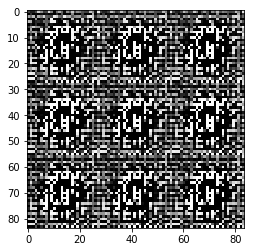

Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 8.9456
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.3140
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.4448
Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 8.8909
Epoch 1/2... Discriminator Loss: 0.0005... Generator Loss: 8.9777
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.7356
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 9.3790
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 9.1059
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7809
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 9.9055


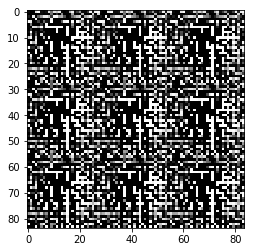

Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 10.3118
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.0933
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.0256
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.9557
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.6267
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 9.6047
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.6894
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8114
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.8722
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7792


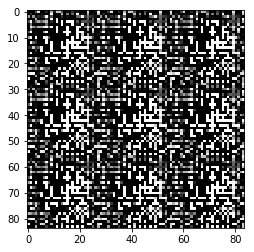

Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.9124
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7708
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8023
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.1473
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.3835
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.5137
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.4613
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.2310
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.0721
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7741


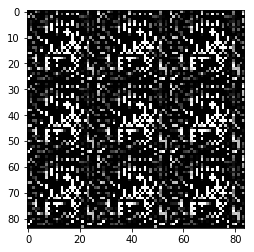

Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.9117
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.0562
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.1157
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.1801
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.2220
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.1982
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.3579
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.6701
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.6261
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.8261


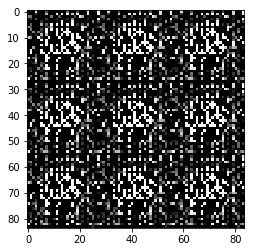

Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.3957
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.2054
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 10.0702
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.5141
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.5010
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.5340
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.4017
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 11.0239
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 10.7960
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.8909


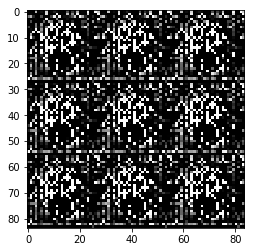

Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 11.1256
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 10.9332
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 11.2304
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 11.1048
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 11.2400
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 10.9409
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 10.2467
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 7.2138
Epoch 1/2... Discriminator Loss: 0.3791... Generator Loss: 1.7317
Epoch 1/2... Discriminator Loss: 1.7555... Generator Loss: 1.6978


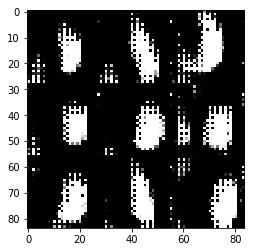

Epoch 1/2... Discriminator Loss: 0.6481... Generator Loss: 2.6945
Epoch 1/2... Discriminator Loss: 0.3432... Generator Loss: 3.0195
Epoch 1/2... Discriminator Loss: 0.2738... Generator Loss: 2.8042
Epoch 1/2... Discriminator Loss: 0.3712... Generator Loss: 3.2176
Epoch 1/2... Discriminator Loss: 0.6201... Generator Loss: 1.3952
Epoch 1/2... Discriminator Loss: 0.6668... Generator Loss: 1.6608
Epoch 1/2... Discriminator Loss: 0.3634... Generator Loss: 2.6408
Epoch 1/2... Discriminator Loss: 3.0548... Generator Loss: 8.0022
Epoch 1/2... Discriminator Loss: 1.4261... Generator Loss: 2.5356
Epoch 1/2... Discriminator Loss: 0.7219... Generator Loss: 3.1822


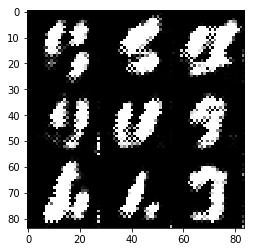

Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 2.0688
Epoch 1/2... Discriminator Loss: 0.6780... Generator Loss: 1.0517
Epoch 1/2... Discriminator Loss: 0.6512... Generator Loss: 1.7051
Epoch 2/2... Discriminator Loss: 0.5015... Generator Loss: 1.8071
Epoch 2/2... Discriminator Loss: 0.6117... Generator Loss: 1.2427
Epoch 2/2... Discriminator Loss: 1.4923... Generator Loss: 0.4153
Epoch 2/2... Discriminator Loss: 0.4313... Generator Loss: 2.2700
Epoch 2/2... Discriminator Loss: 0.9597... Generator Loss: 1.2357
Epoch 2/2... Discriminator Loss: 0.8445... Generator Loss: 1.3172
Epoch 2/2... Discriminator Loss: 1.1405... Generator Loss: 0.5799


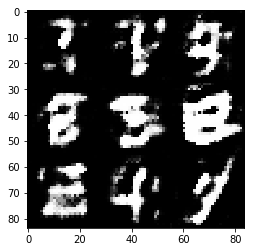

Epoch 2/2... Discriminator Loss: 0.4209... Generator Loss: 2.2634
Epoch 2/2... Discriminator Loss: 0.9241... Generator Loss: 4.9447
Epoch 2/2... Discriminator Loss: 0.5399... Generator Loss: 1.5737
Epoch 2/2... Discriminator Loss: 1.3635... Generator Loss: 2.1823
Epoch 2/2... Discriminator Loss: 0.8432... Generator Loss: 1.0851
Epoch 2/2... Discriminator Loss: 0.6268... Generator Loss: 1.2198
Epoch 2/2... Discriminator Loss: 1.9138... Generator Loss: 4.5024
Epoch 2/2... Discriminator Loss: 1.1803... Generator Loss: 1.1842
Epoch 2/2... Discriminator Loss: 1.2306... Generator Loss: 1.9193
Epoch 2/2... Discriminator Loss: 1.1422... Generator Loss: 1.0971


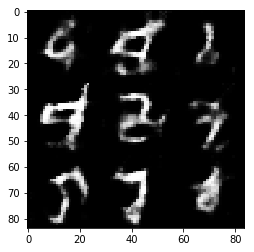

Epoch 2/2... Discriminator Loss: 1.2197... Generator Loss: 1.1547
Epoch 2/2... Discriminator Loss: 1.1275... Generator Loss: 0.9048
Epoch 2/2... Discriminator Loss: 1.4628... Generator Loss: 0.3452
Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.0485
Epoch 2/2... Discriminator Loss: 1.5121... Generator Loss: 1.2506
Epoch 2/2... Discriminator Loss: 0.9247... Generator Loss: 0.9931
Epoch 2/2... Discriminator Loss: 1.0496... Generator Loss: 1.2206
Epoch 2/2... Discriminator Loss: 1.5461... Generator Loss: 0.6862
Epoch 2/2... Discriminator Loss: 0.9790... Generator Loss: 0.8146
Epoch 2/2... Discriminator Loss: 0.8767... Generator Loss: 1.1862


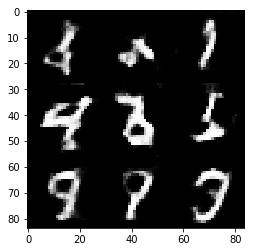

Epoch 2/2... Discriminator Loss: 1.1271... Generator Loss: 0.5641
Epoch 2/2... Discriminator Loss: 1.1132... Generator Loss: 1.3817
Epoch 2/2... Discriminator Loss: 1.7135... Generator Loss: 0.2798
Epoch 2/2... Discriminator Loss: 0.8570... Generator Loss: 1.4000
Epoch 2/2... Discriminator Loss: 0.8262... Generator Loss: 1.3597
Epoch 2/2... Discriminator Loss: 0.9581... Generator Loss: 0.9322
Epoch 2/2... Discriminator Loss: 0.9513... Generator Loss: 1.1921
Epoch 2/2... Discriminator Loss: 0.8188... Generator Loss: 1.3011
Epoch 2/2... Discriminator Loss: 0.8853... Generator Loss: 0.8602
Epoch 2/2... Discriminator Loss: 0.7032... Generator Loss: 1.3886


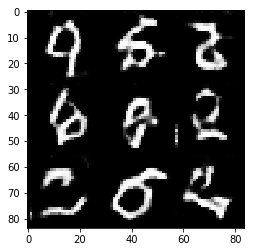

Epoch 2/2... Discriminator Loss: 0.9168... Generator Loss: 0.8021
Epoch 2/2... Discriminator Loss: 1.1076... Generator Loss: 0.7133
Epoch 2/2... Discriminator Loss: 0.9465... Generator Loss: 1.3794
Epoch 2/2... Discriminator Loss: 1.2820... Generator Loss: 0.4486
Epoch 2/2... Discriminator Loss: 0.8387... Generator Loss: 0.9152
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 2.1063... Generator Loss: 1.9665
Epoch 2/2... Discriminator Loss: 0.9424... Generator Loss: 0.8272
Epoch 2/2... Discriminator Loss: 1.4664... Generator Loss: 0.3898
Epoch 2/2... Discriminator Loss: 0.9669... Generator Loss: 0.9501


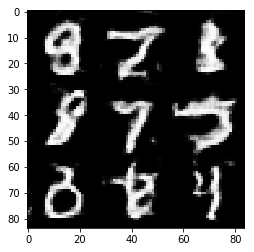

Epoch 2/2... Discriminator Loss: 0.9001... Generator Loss: 0.8266
Epoch 2/2... Discriminator Loss: 0.9260... Generator Loss: 1.2549
Epoch 2/2... Discriminator Loss: 0.9097... Generator Loss: 1.7418
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.1179
Epoch 2/2... Discriminator Loss: 0.9442... Generator Loss: 1.7731
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.9067
Epoch 2/2... Discriminator Loss: 0.7237... Generator Loss: 1.0199
Epoch 2/2... Discriminator Loss: 0.8071... Generator Loss: 0.9202
Epoch 2/2... Discriminator Loss: 0.7446... Generator Loss: 1.4628
Epoch 2/2... Discriminator Loss: 1.0906... Generator Loss: 0.6165


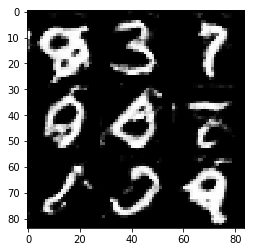

Epoch 2/2... Discriminator Loss: 1.2630... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 0.7101... Generator Loss: 1.6112
Epoch 2/2... Discriminator Loss: 0.6736... Generator Loss: 1.3829
Epoch 2/2... Discriminator Loss: 1.1173... Generator Loss: 0.5860
Epoch 2/2... Discriminator Loss: 0.6384... Generator Loss: 1.2241
Epoch 2/2... Discriminator Loss: 0.7548... Generator Loss: 1.0320
Epoch 2/2... Discriminator Loss: 0.3571... Generator Loss: 2.5521
Epoch 2/2... Discriminator Loss: 0.6293... Generator Loss: 1.1075
Epoch 2/2... Discriminator Loss: 1.2598... Generator Loss: 0.4423
Epoch 2/2... Discriminator Loss: 0.7823... Generator Loss: 1.1186


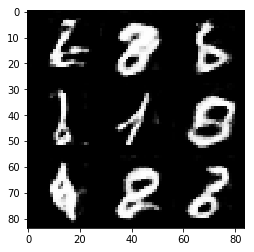

Epoch 2/2... Discriminator Loss: 0.6968... Generator Loss: 0.9920
Epoch 2/2... Discriminator Loss: 0.9696... Generator Loss: 3.7054
Epoch 2/2... Discriminator Loss: 0.5221... Generator Loss: 1.9130
Epoch 2/2... Discriminator Loss: 0.5331... Generator Loss: 1.6399
Epoch 2/2... Discriminator Loss: 0.7246... Generator Loss: 1.4282
Epoch 2/2... Discriminator Loss: 0.4900... Generator Loss: 1.7819
Epoch 2/2... Discriminator Loss: 0.5348... Generator Loss: 1.4049
Epoch 2/2... Discriminator Loss: 1.5569... Generator Loss: 2.9877
Epoch 2/2... Discriminator Loss: 0.6978... Generator Loss: 1.0894
Epoch 2/2... Discriminator Loss: 0.6343... Generator Loss: 1.3034


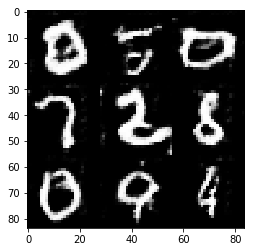

Epoch 2/2... Discriminator Loss: 0.5303... Generator Loss: 1.5913
Epoch 2/2... Discriminator Loss: 0.7360... Generator Loss: 1.0531
Epoch 2/2... Discriminator Loss: 0.9982... Generator Loss: 0.7505
Epoch 2/2... Discriminator Loss: 0.6163... Generator Loss: 1.7024
Epoch 2/2... Discriminator Loss: 1.1458... Generator Loss: 0.7201
Epoch 2/2... Discriminator Loss: 0.7284... Generator Loss: 1.5133
Epoch 2/2... Discriminator Loss: 0.5034... Generator Loss: 1.4665
Epoch 2/2... Discriminator Loss: 0.8841... Generator Loss: 3.5416
Epoch 2/2... Discriminator Loss: 1.0389... Generator Loss: 0.6617
Epoch 2/2... Discriminator Loss: 0.6352... Generator Loss: 1.0911


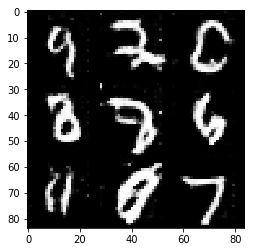

Epoch 2/2... Discriminator Loss: 1.7951... Generator Loss: 0.3518
Epoch 2/2... Discriminator Loss: 0.6965... Generator Loss: 1.0974
Epoch 2/2... Discriminator Loss: 1.2702... Generator Loss: 0.5513
Epoch 2/2... Discriminator Loss: 2.2918... Generator Loss: 0.1593
Epoch 2/2... Discriminator Loss: 0.6364... Generator Loss: 2.1174
Epoch 2/2... Discriminator Loss: 0.4790... Generator Loss: 1.7722
Epoch 2/2... Discriminator Loss: 0.6674... Generator Loss: 1.3134


In [21]:
batch_size = 64
z_dim = 100
learning_rate = 0.0008
beta1 = 0.5
#tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0706... Generator Loss: 2.9204
Epoch 1/1... Discriminator Loss: 0.0131... Generator Loss: 6.3859
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 2.2279
Epoch 1/1... Discriminator Loss: 0.1801... Generator Loss: 2.8537
Epoch 1/1... Discriminator Loss: 0.5556... Generator Loss: 1.7857
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 1.2604
Epoch 1/1... Discriminator Loss: 0.7488... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 0.3884... Generator Loss: 2.0210
Epoch 1/1... Discriminator Loss: 2.3368... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 0.5520... Generator Loss: 2.3449


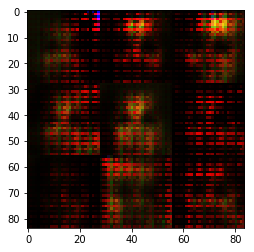

Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.8255... Generator Loss: 0.4215
Epoch 1/1... Discriminator Loss: 1.2686... Generator Loss: 0.9957
Epoch 1/1... Discriminator Loss: 1.5138... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 2.4489... Generator Loss: 0.1427
Epoch 1/1... Discriminator Loss: 1.0708... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.7688... Generator Loss: 0.2559
Epoch 1/1... Discriminator Loss: 1.7002... Generator Loss: 0.3598
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.3295


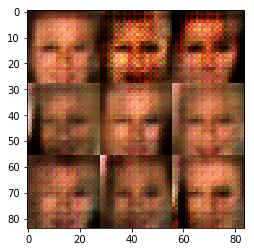

Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.4050
Epoch 1/1... Discriminator Loss: 1.4650... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 1.5147... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 1.6588... Generator Loss: 0.4000
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.5556... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.4882... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.5643
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.7541


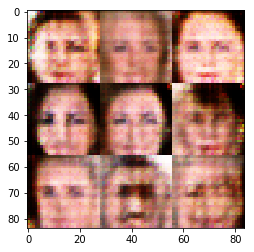

Epoch 1/1... Discriminator Loss: 1.5392... Generator Loss: 0.8250
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.8386
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.5407
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.8583
Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 0.8871
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.4971


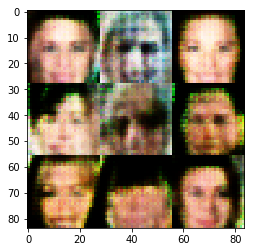

Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.9005... Generator Loss: 1.8170
Epoch 1/1... Discriminator Loss: 1.5135... Generator Loss: 0.4928
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.6084
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.9904
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 0.9515
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.4387
Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 0.6567


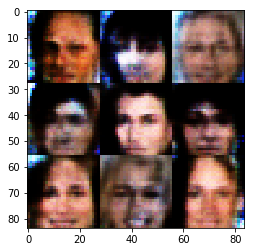

Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.1414... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.2848... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.5225
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.5262
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.4388
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.4438
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.4293


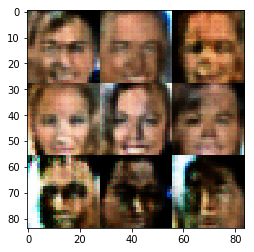

Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.5889
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.4727
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.4486... Generator Loss: 0.4299
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.4813
Epoch 1/1... Discriminator Loss: 1.4655... Generator Loss: 0.4222
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 0.5591
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.8230


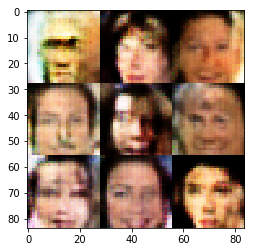

Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.6321
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.5993... Generator Loss: 0.3547
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.5056
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.8002


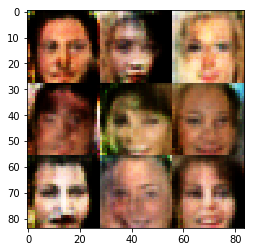

Epoch 1/1... Discriminator Loss: 1.5165... Generator Loss: 1.2949
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.7406
Epoch 1/1... Discriminator Loss: 1.4610... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.1640... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 2.2185... Generator Loss: 1.7637
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.4642... Generator Loss: 0.4974


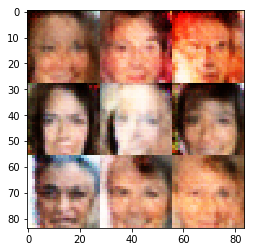

Epoch 1/1... Discriminator Loss: 1.4651... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.5387
Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 1.0238
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.6183
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.7126


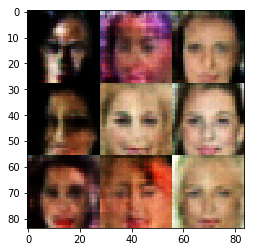

Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 1.3063
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.9700
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.5387
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.6914


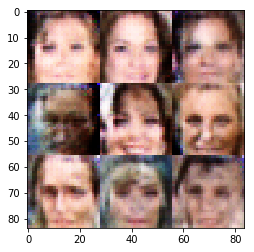

Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.4506
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.5567... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.4840... Generator Loss: 0.5035
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.5416


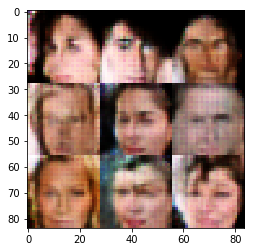

Epoch 1/1... Discriminator Loss: 1.5443... Generator Loss: 0.3914
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.5215... Generator Loss: 0.4285
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.5647
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.4795... Generator Loss: 0.4374
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.5457


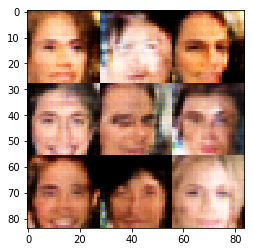

Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 1.3178... Generator Loss: 0.6420
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.8357
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.5230
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 0.5686
Epoch 1/1... Discriminator Loss: 1.2860... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.4827
Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 1.1082
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.5793


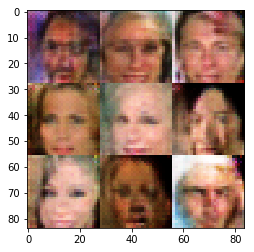

Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 1.0075
Epoch 1/1... Discriminator Loss: 1.5197... Generator Loss: 0.9628
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.8221
Epoch 1/1... Discriminator Loss: 1.5258... Generator Loss: 0.3629
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.6849
Epoch 1/1... Discriminator Loss: 1.3378... Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.6830


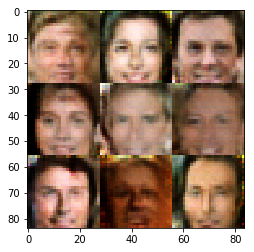

Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.5725
Epoch 1/1... Discriminator Loss: 1.7120... Generator Loss: 1.5688
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.5639... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 0.6445


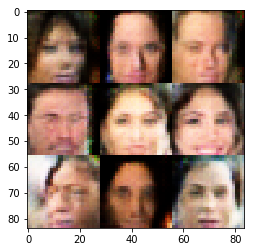

Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 1.3101
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.5722
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.4727
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.6080
Epoch 1/1... Discriminator Loss: 1.3291... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.5580
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.7563


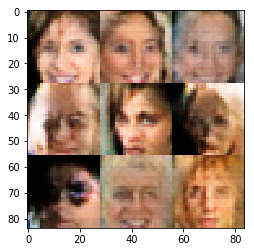

Epoch 1/1... Discriminator Loss: 1.5085... Generator Loss: 0.5017
Epoch 1/1... Discriminator Loss: 1.4691... Generator Loss: 0.4093
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.3193
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.5161
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 1.4465... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.5387


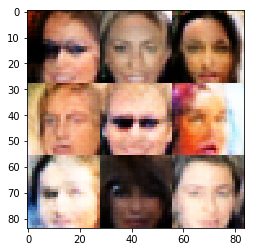

Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.9933
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.5845
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.5807
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.5860
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.6276


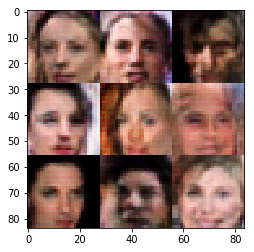

Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.6799... Generator Loss: 0.3030
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.6132


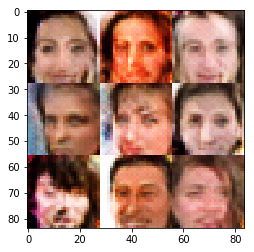

Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 0.7744
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.4916... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.9705
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6515


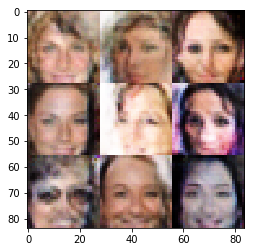

Epoch 1/1... Discriminator Loss: 1.5653... Generator Loss: 0.4894
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.3112... Generator Loss: 0.9274
Epoch 1/1... Discriminator Loss: 1.4534... Generator Loss: 0.5469
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.4669... Generator Loss: 1.2765
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.5508
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.7044


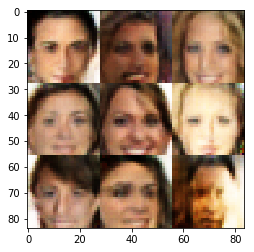

Epoch 1/1... Discriminator Loss: 1.4929... Generator Loss: 0.4857
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.4685... Generator Loss: 0.5495
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.5503
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.4979
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.6831


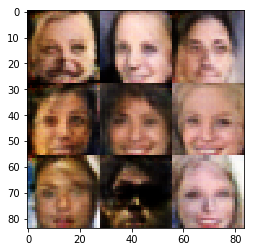

Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.5892
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.5163
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.6614
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.8298
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.5710


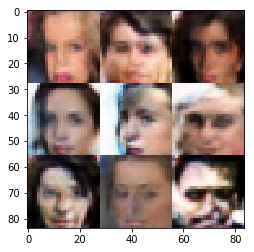

Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.4437... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.5697... Generator Loss: 0.4339
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.7640


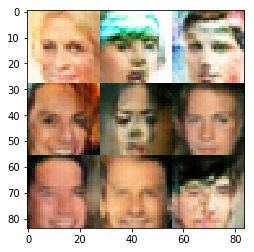

Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.6349
Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 0.8452
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 1.5554... Generator Loss: 0.3596


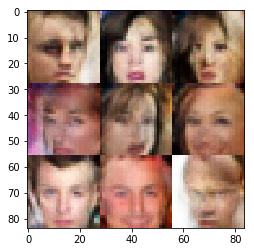

Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.5854
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.4934... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.6688


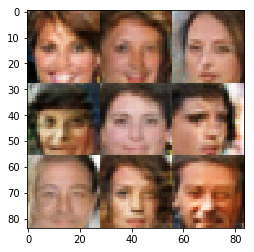

Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.5600
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.3121... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.4582... Generator Loss: 0.4924
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.5819
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.6996
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.6253


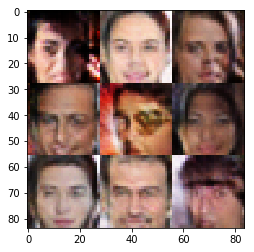

Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.4912
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.6258
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7055


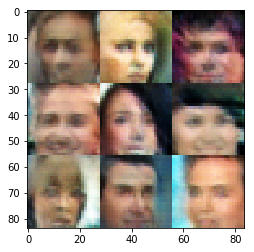

Epoch 1/1... Discriminator Loss: 1.2605... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.3539... Generator Loss: 0.8151
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.6087
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.6979


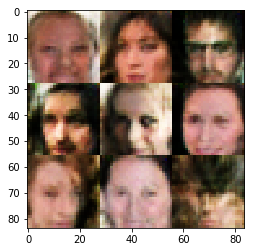

Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.5416
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.3862
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.5819
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.7421


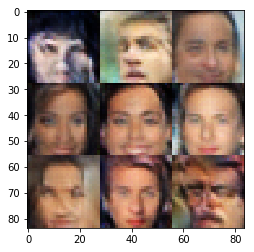

Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.5180
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.7548


In [20]:
batch_size = 64
z_dim = 100
learning_rate = .0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.